### California Housing Price Prediction

#### Load the data :

1. Read the “housing.csv” file from the folder into the program.
2. Print first few rows of this data.
3. Extract input (X) and output (Y) data from the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_excel('1553768847_housing.xlsx')

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
X = house.iloc[:, :-1].values
    # select all columns except the last column
X

array([[-122.23, 37.88, 41, ..., 126, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52, ..., 177, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 'INLAND'],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 'INLAND']], dtype=object)

In [5]:
Y = house.iloc[:, [-1]].values
    # select only the last column
Y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

#### Handle missing values :

Fill the missing values with the mean of the respective column.

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
missingValueImputer = SimpleImputer()

In [12]:
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
Y = missingValueImputer.fit_transform(Y)

In [13]:
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

In [14]:
Y

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [6]:
import warnings
warnings.filterwarnings('ignore')

#### Encode categorical data :

Convert categorical column in the dataset to numerical data.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
X_label_encoder = LabelEncoder()

In [17]:
X[:, -1] = X_label_encoder.fit_transform(X[:, -1])

In [18]:
X[:, -1]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

#### Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, random_state=42)

#### Standardize data :

Standardize training and test datasets.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

#### Perform Linear Regression : 

    1. Perform Linear Regression on training data.
    2. Predict output for test dataset using the fitted model.
    3. Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(Y_test, Y_pred)

In [36]:
print('Mean Squared Error: ' + str(mse))

Mean Squared Error: 0.37814987344825857


#### Perform Decision Tree Regression :

    1. Perform Decision Tree Regression on training data.
    2. Predict output for test dataset using the fitted model.
    3. Print root mean squared error from Decision Tree Regression.

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dtr = DecisionTreeRegressor()

In [39]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [40]:
Y_pred_dtr = dtr.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mse_dtr = mean_squared_error(Y_test, Y_pred_dtr)

In [43]:
print('Mean Squared Error: ' + str(mse_dtr))

Mean Squared Error: 0.3439778626195731


#### Perform Random Forest Regression :

    1. Perform Random Forest Regression on training data.
    2. Predict output for test dataset using the fitted model.
    3. Print RMSE (root mean squared error) from Random Forest Regression.

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor()

In [46]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [48]:
Y_pred_rfr = rfr.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mse_rfr = mean_squared_error(Y_test, Y_pred_rfr)

In [51]:
print('Mean Squared Error: ' + str(mse_rfr))

Mean Squared Error: 0.1855113567940177


#### Bonus exercise: Perform Linear Regression with one independent variable :

    1. Extract just the median_income column from the independent variables (from X_train and X_test).
    2. Perform Linear Regression to predict housing values based on median_income.
    3. Predict output for test dataset using the fitted model.
    4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [54]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [52]:
X_train_median_income = X_train[: , [7]]

In [53]:
X_test_median_income = X_test[: , [7]]

In [55]:
model_2 = LinearRegression()

In [57]:
model_2.fit(X_train_median_income, Y_train)

LinearRegression()

In [58]:
Y_pred_model_2 = model_2.predict(X_test_median_income)

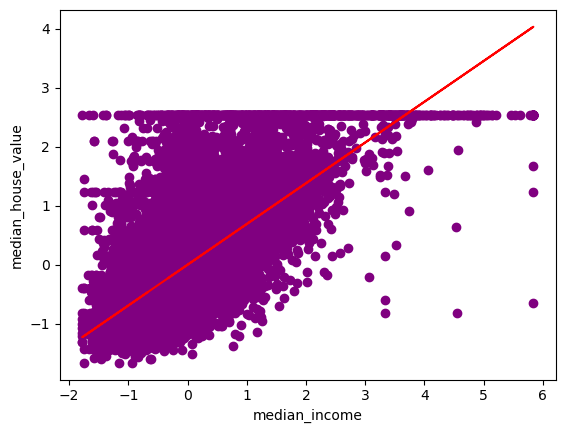

In [66]:
# for Training set

plt.scatter(X_train_median_income, Y_train, color = 'purple')
plt.plot (X_train_median_income, model_2.predict(X_train_median_income), color = 'red')

plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

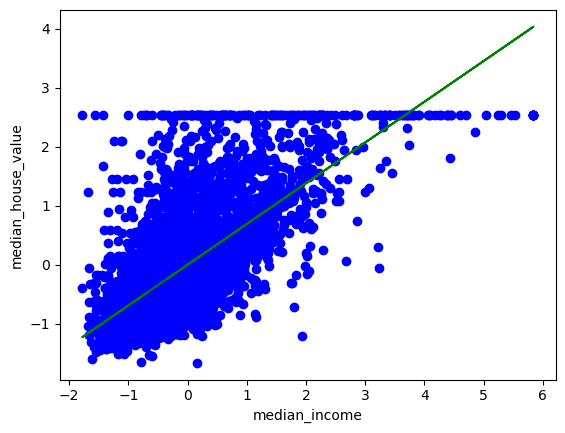

In [68]:
# for Testing set

plt.scatter(X_test_median_income, Y_test, color = 'blue')
plt.plot(X_train_median_income, model_2.predict(X_train_median_income), color = 'green')

plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()